In [2]:
# import test_tensor_2d as tt ttbd
import quimb.tensor as qtn
import quimb as qu
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload

import spinlessQubit as sq
import hubbardAnalytical as han

In [132]:
reload(sq)
sql = sq.SpinlessQubitLattice()
sql.t_make_stabilizers()

1-----2
|     |
4-----5
None None 6 None


In [616]:
reload(sq)
reload(han)

##Testing params
T_PARAM=1
V_PARAM=1
MU_PARAM=0.5
LX, LY = 2, 3


### Analytical Hubbard Hamiltonian
hub = han.FermiHubbardSpinless(Lx=LX, Ly=LY)
hub.build_spinless_ham(t=T_PARAM, V=V_PARAM, mu=MU_PARAM)
Hexact = hub._Ham.copy()
gex, gsx = qu.eigh(Hexact)
print('Exact:  {}'.format(gex[0]))
nx = hub.stateOccs(state=gsx[:,0])
print(nx)


### Qubit lattice Hamiltonian
sql = sq.SpinlessQubitLattice(Lx=LX,Ly=LY)
sql.make_spinless_Hubbard(t=T_PARAM, V=V_PARAM, mu=MU_PARAM)

sql.make_stabilizer()
Hsim = sql.ham_sim()
# nv, nf = sql.state_local_occs(k=0)
# plt.imshow(nv)
# plt.colorbar()
# print(nf)

###
print('\nPROJECTION 2\n')
###
pHam = sql.projected_ham_2()
Vpos = sql._pVecs
newpvals, npes = qu.eigh(pHam)
wgs = npes[:,0]
print(newpvals[0])
print(sql.state_local_occs(k=None, state=Vpos@wgs))


###
print('\nROTATION 3\n')
###
rotHam = sql.projected_ham_3() #in "rotated" basis
Uplus = sql._Uplus
rens, reigst = qu.eigh(rotHam)
print(rens[0])
print(sql.state_local_occs(k=None, state=Uplus@reigst[:,0]))

Exact:  -5.074324162277432
[[0.51763622 0.46472757 0.51763622]
 [0.51763622 0.46472757 0.51763622]]
3--->4,  face 6
4--->5,  face None
2--->1,  face None
1--->0,  face 6
3--->0,  face 6
5--->2,  face None
1--->4,  face 6

PROJECTION 2

-5.036250883274811
(array([[0.51740422, 0.46519155, 0.51740422],
       [0.51740422, 0.46519155, 0.51740422]]), array([0.5]))

ROTATION 3

-5.036250883274806
(array([[0.51740422, 0.46519155, 0.51740422],
       [0.51740422, 0.46519155, 0.51740422]]), array([0.5]))


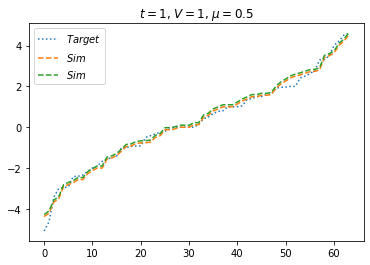

In [593]:
plt.plot(gex, ':', label=r'$Target$') #exact Hubbard energies
plt.plot(newpvals, '--',label=r'$Sim$')
plt.plot(rens+0.1, '--',label=r'$Sim$')

plt.title(r'$t={}$, $V={}$, $\mu={}$'.format(T_PARAM,V_PARAM,MU_PARAM))
plt.legend()
